## Классификация рукописных цифр mnist

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ul>
Для классификации будем использовать следующие датасеты:
<li><b>mnist_test.csv</b> - тестовый набор из 10000 цифр (можно скачать здесь https://pjreddie.com/media/files/mnist_test.csv);</li>
<li><b>mnist_test_10.csv</b> - тестовый набор из 10 цифр для разработки;</li>
<li><b>mnist_train.csv</b> - тренировочный набор из 60000 цифр (можно скачать здесь https://pjreddie.com/media/files/mnist_train.csv);</li>
<li><b>mnist_train_100.csv</b> - тренировочный набор из 100 цифр для разработки.</li>
</ul>

### 1. Изучаем данные:

In [2]:
with open('mnist_test_10.csv', 'r') as f:
    mnist_test = f.readlines()

In [3]:
len(mnist_test)

10

In [4]:
mnist_test[0]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

Первое значение 7 - это маркер, поэтому при дальнейшей работе с числами его необходимо игнорировать.

In [5]:
len(mnist_test[0].split(',')[1:])

784

In [6]:
max([int(x) for x in mnist_test[0].split(',')[1:]])

255

In [7]:
min([int(x) for x in mnist_test[0].split(',')[1:]])

0

In [8]:
with open('mnist_train_100.csv', 'r') as f:
    mnist_train = f.readlines()

In [9]:
len(mnist_train)

100

In [10]:
mnist_train[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
len(mnist_train[3].split(',')[1:])

784

In [12]:
max([int(x) for x in mnist_train[3].split(',')[1:]])

255

In [13]:
min([int(x) for x in mnist_train[3].split(',')[1:]])

0

Каждая цифра из датасета mnist состоит из 784 символа, т.к. все изображения имеют стандартный размер 28x28. И имеют значения кодов цветов в диапазоне от 0 до 255.

In [14]:
def csv_to_image(line):
    img_data = np.asfarray(line.split(',')[1:]).reshape(28, 28)
    plt.imshow(img_data, cmap='Greys', interpolation='None');

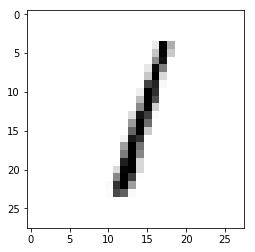

In [15]:
csv_to_image(mnist_test[2])

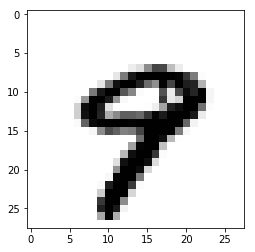

In [16]:
csv_to_image(mnist_test[9])

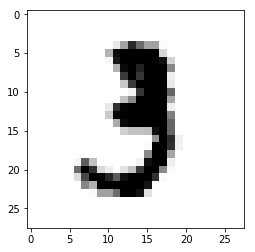

In [17]:
csv_to_image(mnist_train[10])

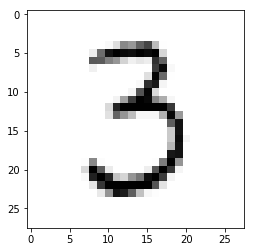

In [18]:
csv_to_image(mnist_train[50])

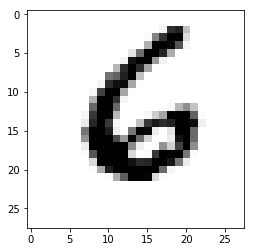

In [19]:
csv_to_image(mnist_train[90])

### 2. Подготовка данных:

Первое что необходимо сделать - преобразовать значения от 0 до 255 в значения от 0.01 до 1.0 как более оптимальные для активации узлов нейронной сети.

In [20]:
def csv_to_input_list(line):
    img_data = np.asfarray(line.split(',')[1:])
    return (img_data / 255.0 * 0.99) + 0.01

In [21]:
csv_to_input_list(mnist_test[0])

array([ 0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01

Теперь надо подготовить примеры на которых сети необходимо проводить обучение. Так как всего цифр 10, то и выходных слоев сети должно быть тоже 10. Узел с наибольшим выходным весом будет определять соответсвующую цифру, например, выходные веса [0.01, 0.00, 0.25, 0.00, 0.01, 0.00, 0.01, 0.79, 0.00] - соответствуют цифре 8. Нули в данном случае - ошибки округления, так как функция активации у нас сигмойда, и она будет бесконечно стремиться к 0 или 1, но никогда не достигнет их. Соответственно, учитывая данную логику, можно составить примеры "идеальных" весов для каждой из 10 цифр для тренировки сети. Например, [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01] будут соответствовать "идеальной" цифре 8.

In [22]:
def csv_to_target_list(line):
    base = np.array([0.01] * 10)
    marker = int(line.split(',')[0])  # чтобы понять какой у нас число, берем первый символ - маркер числа
    base[marker] = 0.99
    return base

In [23]:
mnist_test[0].split(',')[0]

'7'

In [24]:
csv_to_target_list(mnist_test[0])

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.99,  0.01,  0.01])

In [25]:
len(csv_to_target_list(mnist_test[0]))

10

Вроде все ок, можно приступать к тренировки сети.

### 3. Тренировка сети:

#### 1. Определимся с параметрами сети:

In [26]:
# количество входных слоев будет равно количеству символов в каждой строке датасета, чтобы избежать излишнего обобщения информации
INPUT_NODES = 784

# количество выходных слоев будет равно общему количеству всех возможных маркеров ответа
OUTPUT_NODES = 10

# количество скрытых слоев будет равно 10 * 10 - общее количество выходных слоев * количество всех возможных маркеров ответа
HIDDEN_NODES = 100

#### 2. Заимпортируем и создадим объект нейронной сети:

In [8]:
import os
import sys

try:
    from neural_network import NeuralNetwork
except ImportError:
    path = os.path.abspath(os.path.join('..'))
    if path not in sys.path:
        sys.path.insert(1, path)
    from neural_network import NeuralNetwork

In [28]:
nn = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES)

#### 3. Создадим функцию для чтения тренировочных данных:

Для того, чтобы более эффективно использовать ресурсы компьютера лучше читать файлы с помощью генератора.

In [29]:
def xreadlines(file_path):
    with open(file_path, mode='r', encoding='utf-8') as file:
        for line in file:
            if line:
                yield line

In [30]:
def train_nn(file_path, n, epochs=1):
    for e in range(epochs):
        for line in xreadlines(file_path):
            input_list = csv_to_input_list(line)
            target_list = csv_to_target_list(line)
            n.train(input_list, target_list)

#### 4. Проведем эксперимент:

In [31]:
# Для начала обучим сеть на тренировочной подвыборке из 100 цифр
train_nn('mnist_train_100.csv', nn)

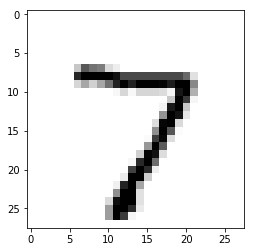

In [32]:
csv_to_image(mnist_test[0])

In [33]:
# Посмотрим, что сеть скажет про первую цифру тестовой подвыборке из 10 цифр
print('Целевое значение:', mnist_test[0][0])
predictions = nn.predict(csv_to_input_list(mnist_test[0]))
for i, w in enumerate(predictions):
    print('Вес для цифры {} -> {:.10f}'.format(i, w[0]))

Целевое значение: 7
Вес для цифры 0 -> 0.0354310205
Вес для цифры 1 -> 0.0199718639
Вес для цифры 2 -> 0.0206211334
Вес для цифры 3 -> 0.0895488224
Вес для цифры 4 -> 0.0980779868
Вес для цифры 5 -> 0.0391297939
Вес для цифры 6 -> 0.0043324467
Вес для цифры 7 -> 0.9161812472
Вес для цифры 8 -> 0.0354706511
Вес для цифры 9 -> 0.0269658433


Видно, что нейросеть научилась определять целевое значение 7 с достаточно высокой точностью.

#### 5. Проверим работу нейросети на всей тестовой подвыборке:

In [34]:
def explore_nn(file_path, n, verbose=False):
    total = 0
    errors = 0
    for line in xreadlines(file_path):
        input_list = csv_to_input_list(line)
        ca = int(line[0][0])
        predictions = n.predict(input_list)
        p = predictions.argmax()
        if verbose:
            print('Целевое значение:', ca)
            print('Предсказание сети:', p)
            print('Точное совпадение:', 'да' if ca == p else 'нет')
            print()
        total += 1
        if ca != p:
            errors += 1
    return 1 - errors / total

In [35]:
accuracy = explore_nn('mnist_test_10.csv', nn, True)

Целевое значение: 7
Предсказание сети: 7
Точное совпадение: да

Целевое значение: 2
Предсказание сети: 6
Точное совпадение: нет

Целевое значение: 1
Предсказание сети: 1
Точное совпадение: да

Целевое значение: 0
Предсказание сети: 0
Точное совпадение: да

Целевое значение: 4
Предсказание сети: 4
Точное совпадение: да

Целевое значение: 1
Предсказание сети: 1
Точное совпадение: да

Целевое значение: 4
Предсказание сети: 4
Точное совпадение: да

Целевое значение: 9
Предсказание сети: 3
Точное совпадение: нет

Целевое значение: 5
Предсказание сети: 4
Точное совпадение: нет

Целевое значение: 9
Предсказание сети: 7
Точное совпадение: нет



In [36]:
print('Точность сети: {:.3f}'.format(accuracy))

Точность сети: 0.600


Учитывая, что тренировочная выборка составляет всего 100 цифр, то текущую точность сети можно считать неплохим результатом.

### 4. Тренировка сети на полной базе данных:

In [37]:
nn2 = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES)

In [39]:
train_nn('mnist_train.csv', nn2)

In [40]:
print('Точность сети: {:.4f}'.format(explore_nn('mnist_test.csv', nn2, False)))

Точность сети: 0.9490


Точность распознования составила почти 95%, очень неплохой результат!

#### Попробуем немного поиграться с коэфициентом обучения:

In [44]:
nn3 = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES, rate=0.1)

In [45]:
train_nn('mnist_train.csv', nn3)

In [46]:
print('Точность сети: {:.4f}'.format(explore_nn('mnist_test.csv', nn3, False)))

Точность сети: 0.9497


Точность распознования немного улучшилась!

In [47]:
nn4 = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES, rate=0.01)

In [48]:
train_nn('mnist_train.csv', nn4)

In [49]:
print('Точность сети: {:.4f}'.format(explore_nn('mnist_test.csv', nn4, False)))

Точность сети: 0.9216


Точность распознования около 92%, точность прогноза ухудшилась, видимо слишком маленький коэфициент не слишком хорошо влияет на обучение сети.

In [50]:
nn5 = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES, rate=0.6)

In [51]:
train_nn('mnist_train.csv', nn5)

In [52]:
print('Точность сети: {:.4f}'.format(explore_nn('mnist_test.csv', nn5, False)))

Точность сети: 0.9126


Точность распознования около 91%, точность прогноза еще больше ухудшилась, видимо оптимальный коэфициент обучения находится между 0.1 и 0.3.

#### Попробуем поднять точность обучения с помощью увеличения количества эпох (таким образом мы обеспечиваем большее число маршрутов градиентного спуска и оптимизируем весовые коэфициенты):

In [53]:
# Возьмем наилучший весовой коэфициент сети
nn3 = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES, rate=0.1)

In [54]:
# Поставим 5 эпох для начала:
train_nn('mnist_train.csv', nn3, epochs=5)

In [55]:
print('Точность сети: {:.4f}'.format(explore_nn('mnist_test.csv', nn3, False)))

Точность сети: 0.9649


Как видим, точность поднялась еще выше и составила почти 97%!

#### Попробуем увеличить количество скрытых узлов в сети, чтобы еще улучшить точность:

In [56]:
# Увеличим количество скрытых узлов до 500
nn6 = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=500, output_nodes=OUTPUT_NODES, rate=0.1)

In [57]:
train_nn('mnist_train.csv', nn6, epochs=5)

In [58]:
print('Точность сети: {:.4f}'.format(explore_nn('mnist_test.csv', nn6, False)))

Точность сети: 0.9725


Точность еще больше выросла. При желании, можно и дальше проводить эксперимерты, но надо учитывать, что при добавлении новой эпохи и количества скрытых слоев, время обучения сети сильно увеличивается.

#### Сохраним лучшую модель:

In [59]:
nn6.save('best_model')

### 5. Тренировка сети на собственном рукописном тексте:

Для рукописного текста, я подготовил несколько изображений в фотошопе и еще парочку достал из других источников.

<img src='images/five.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/four.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/one.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/seven.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/six.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/six_noise.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/three.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/two.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/two_2.jpg' style="width: 100px; height: 100px; float: left"/>
<img src='images/zero.jpg' style="width: 100px; height: 100px; float: left"/>

Как видно, некоторые изображения специально искажены, а к одному из них специально добавлен шум.

#### Преобразуем изображения в массив чисел с плавающей запятой в пределах от 0.01 до 1.0:

In [4]:
import scipy.misc

In [5]:
def image_to_input_list(img_path):
    img_data = scipy.misc.imread(img_path, flatten=True)
    # инвертируем значения массива, т.к. в MNIST использует обратную кодировку от scipy
    img_data = 255.0 - img_data.reshape(784)
    return (img_data / 255.0 * 0.99) + 0.01

In [6]:
image_to_input_list('images/five.jpg')

array([ 0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01388235,  0.01      ,
        0.01388235,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01388235,
        0.01      ,  0.01      ,  0.01388235,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01388235,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.07211765,  0.11094118,  0.11870588,  0.11094118,  0.11

#### Загрузим лучшую модель:

In [9]:
nn = NeuralNetwork(load_from='best_model')

#### Посмотрим насколько хорошо сеть справляется с кастомным рукописным текстом:

In [10]:
def show_predictions(predictions):
    for i, w in enumerate(predictions):
        print('Вес для цифры {} -> {:.10f}'.format(i, w[0]))

Начнем с цифры 5:

In [11]:
show_predictions(nn.predict(image_to_input_list('images/five.jpg')))

Вес для цифры 0 -> 0.0222999790
Вес для цифры 1 -> 0.0032932173
Вес для цифры 2 -> 0.0019129445
Вес для цифры 3 -> 0.0277279042
Вес для цифры 4 -> 0.0005371695
Вес для цифры 5 -> 0.9763342430
Вес для цифры 6 -> 0.0105978024
Вес для цифры 7 -> 0.0075996655
Вес для цифры 8 -> 0.0005626015
Вес для цифры 9 -> 0.0070683748


<img src='images/five.jpg' style="width: 100px; height: 100px; float: left"/>

Для начала неплохо, модель хорошо распознает цифру 5, проверим теперь и остальные цифры:

In [12]:
show_predictions(nn.predict(image_to_input_list('images/four.jpg')))

Вес для цифры 0 -> 0.0007541365
Вес для цифры 1 -> 0.0025920285
Вес для цифры 2 -> 0.0353838783
Вес для цифры 3 -> 0.0002477696
Вес для цифры 4 -> 0.9626062560
Вес для цифры 5 -> 0.0152731318
Вес для цифры 6 -> 0.0173952589
Вес для цифры 7 -> 0.0010828078
Вес для цифры 8 -> 0.0001708904
Вес для цифры 9 -> 0.0031941232


<img src='images/four.jpg' style="width: 100px; height: 100px; float: left"/>

Четверка определилась правильно.

In [23]:
show_predictions(nn.predict(image_to_input_list('images/one.jpg')))

Вес для цифры 0 -> 0.0425234483
Вес для цифры 1 -> 0.2822383418
Вес для цифры 2 -> 0.0050983757
Вес для цифры 3 -> 0.1590123194
Вес для цифры 4 -> 0.0543518305
Вес для цифры 5 -> 0.0085491528
Вес для цифры 6 -> 0.0013195951
Вес для цифры 7 -> 0.0960994036
Вес для цифры 8 -> 0.0135681280
Вес для цифры 9 -> 0.1195058321


<img src='images/one.jpg' style="width: 100px; height: 100px; float: left"/>

Несмотря на то, что сеть похоже не очень уверена, но единицу она определила правильно.

In [21]:
show_predictions(nn.predict(image_to_input_list('images/seven.jpg')))

Вес для цифры 0 -> 0.0008799448
Вес для цифры 1 -> 0.0018449957
Вес для цифры 2 -> 0.1394751755
Вес для цифры 3 -> 0.4410388135
Вес для цифры 4 -> 0.0004980157
Вес для цифры 5 -> 0.0028410751
Вес для цифры 6 -> 0.0004443375
Вес для цифры 7 -> 0.1821643828
Вес для цифры 8 -> 0.0320637325
Вес для цифры 9 -> 0.0056195619


<img src='images/seven.jpg' style="width: 100px; height: 100px; float: left"/>

Здесь модель не справилась и считает, что вместо семерки здесь тройка.

In [14]:
show_predictions(nn.predict(image_to_input_list('images/six.jpg')))

Вес для цифры 0 -> 0.0031615175
Вес для цифры 1 -> 0.0011432759
Вес для цифры 2 -> 0.0003620161
Вес для цифры 3 -> 0.0062408888
Вес для цифры 4 -> 0.0010137454
Вес для цифры 5 -> 0.1695590737
Вес для цифры 6 -> 0.2940195972
Вес для цифры 7 -> 0.0145087324
Вес для цифры 8 -> 0.0053077657
Вес для цифры 9 -> 0.0018103439


<img src='images/six.jpg' style="width: 100px; height: 100px; float: left"/>

Модель неплохо определила даже деформированную шестерку.

In [15]:
show_predictions(nn.predict(image_to_input_list('images/six_noise.jpg')))

Вес для цифры 0 -> 0.1280496250
Вес для цифры 1 -> 0.0086655110
Вес для цифры 2 -> 0.0212251200
Вес для цифры 3 -> 0.2190672760
Вес для цифры 4 -> 0.0048936113
Вес для цифры 5 -> 0.1117955566
Вес для цифры 6 -> 0.0795651566
Вес для цифры 7 -> 0.0028625988
Вес для цифры 8 -> 0.6099485385
Вес для цифры 9 -> 0.0906649639


<img src='images/six_noise.jpg' style="width: 100px; height: 100px; float: left"/>

Для изображения с шумом, неудивительно, что модель не смогла правильно определить цифру.

In [16]:
show_predictions(nn.predict(image_to_input_list('images/three.jpg')))

Вес для цифры 0 -> 0.0008523175
Вес для цифры 1 -> 0.0017773125
Вес для цифры 2 -> 0.0003605738
Вес для цифры 3 -> 0.7843868877
Вес для цифры 4 -> 0.0000506208
Вес для цифры 5 -> 0.0121479265
Вес для цифры 6 -> 0.0001941202
Вес для цифры 7 -> 0.0003430569
Вес для цифры 8 -> 0.0000036581
Вес для цифры 9 -> 0.0000110076


<img src='images/three.jpg' style="width: 100px; height: 100px; float: left"/>

Тройка определилась неплохо, даже несмотря на вкрапления белого цвета.

In [20]:
show_predictions(nn.predict(image_to_input_list('images/two.jpg')))

Вес для цифры 0 -> 0.0156186072
Вес для цифры 1 -> 0.0246246385
Вес для цифры 2 -> 0.9548647913
Вес для цифры 3 -> 0.0524493768
Вес для цифры 4 -> 0.0186438331
Вес для цифры 5 -> 0.0319417224
Вес для цифры 6 -> 0.0057217541
Вес для цифры 7 -> 0.0058064709
Вес для цифры 8 -> 0.0001597272
Вес для цифры 9 -> 0.0132114378


<img src='images/two.jpg' style="width: 100px; height: 100px; float: left"/>

Здесь все правильно, несмотря на то, что двойка довольно кривовато получилась.

In [81]:
show_predictions(nn.predict(image_to_input_list('images/two_2.jpg')))

Вес для цифры 0 -> 0.0032380126
Вес для цифры 1 -> 0.0105357637
Вес для цифры 2 -> 0.9059827637
Вес для цифры 3 -> 0.1955743529
Вес для цифры 4 -> 0.0012692512
Вес для цифры 5 -> 0.0018996910
Вес для цифры 6 -> 0.0010226954
Вес для цифры 7 -> 0.0210304132
Вес для цифры 8 -> 0.0007624490
Вес для цифры 9 -> 0.0009966362


<img src='images/two_2.jpg' style="width: 100px; height: 100px; float: left"/>

Нерукописная двойка определилась очень хорошо.

In [82]:
show_predictions(nn.predict(image_to_input_list('images/zero.jpg')))

Вес для цифры 0 -> 0.7795007064
Вес для цифры 1 -> 0.0067088078
Вес для цифры 2 -> 0.3075664516
Вес для цифры 3 -> 0.1193723156
Вес для цифры 4 -> 0.0107679247
Вес для цифры 5 -> 0.0449622491
Вес для цифры 6 -> 0.0042284284
Вес для цифры 7 -> 0.0011476479
Вес для цифры 8 -> 0.0032944412
Вес для цифры 9 -> 0.3497384111


<img src='images/zero.jpg' style="width: 100px; height: 100px; float: left"/>

Все правильно, здесь действительно ноль!

#### Подведем итоги:

Получается, что в 2 случаях из 10 сеть ошиблась с предсказанием, но если для картинки с шумом в этом нет ничего удивительного, то ошибка с семеркой - довольно странная.